<a href="https://colab.research.google.com/github/suazojaime/employee_attrition/blob/main/Untitled0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

Uncover the factors that lead to employee attrition and explore important questions such as ‘show me a breakdown of distance from home by job role and attrition’ or ‘compare average monthly income by education and attrition’. This is a fictional data set created by IBM data scientists.

In [2]:
df = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')
df

Age Attrition  ... YearsSinceLastPromotion  YearsWithCurrManager
0      41       Yes  ...                       0                     5
1      49        No  ...                       1                     7
2      37       Yes  ...                       0                     0
3      33        No  ...                       3                     0
4      27        No  ...                       2                     2
...   ...       ...  ...                     ...                   ...
1465   36        No  ...                       0                     3
1466   39        No  ...                       1                     7
1467   27        No  ...                       0                     3
1468   49        No  ...                       0                     8
1469   34        No  ...                       1                     2

[1470 rows x 35 columns]

In [3]:
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [4]:
df.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [5]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [6]:
df.duplicated().sum()

0

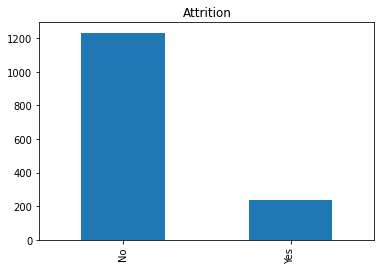

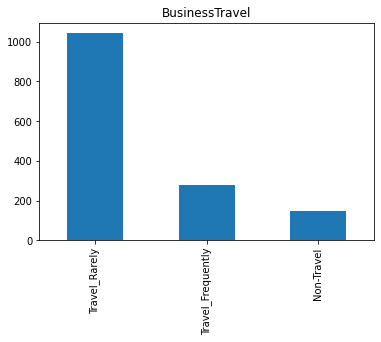

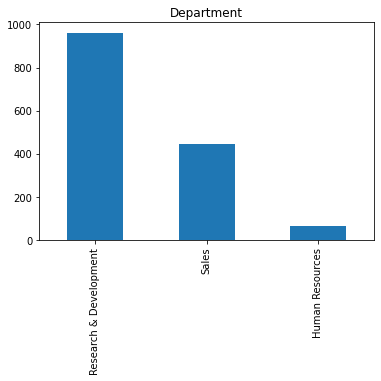

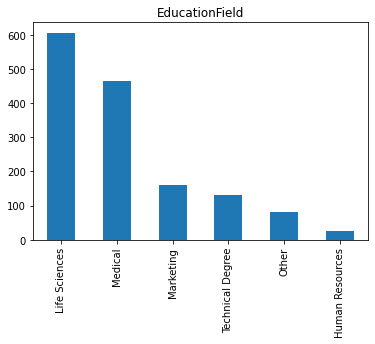

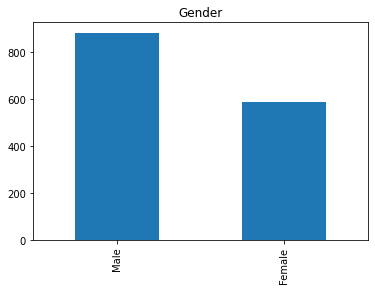

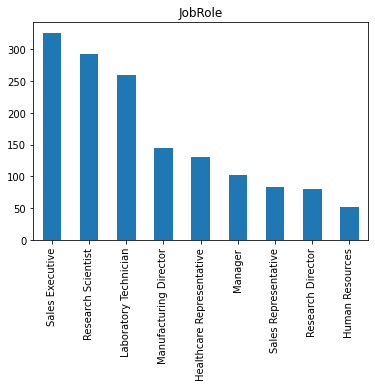

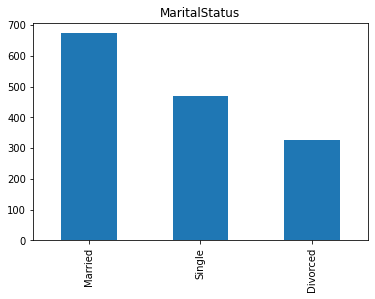

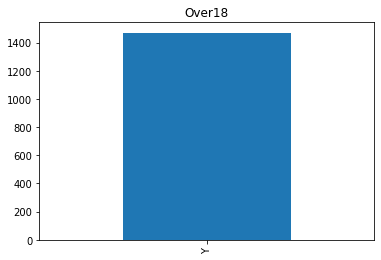

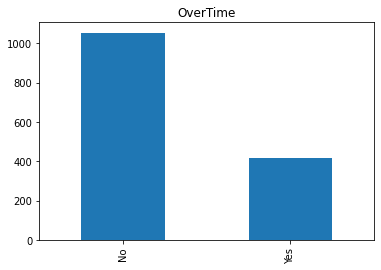

In [7]:
for n in df.select_dtypes(include='object'):
  plt.figure() #figsize=(10,3))
  #plt.hist(df[n],density=True)
  df[n].value_counts().plot(kind='bar')
  plt.title(n)
  plt.xticks(rotation=90)


la columna Over18 no aporta información

Hay un sesgo en la OverTime y BusinessTravel


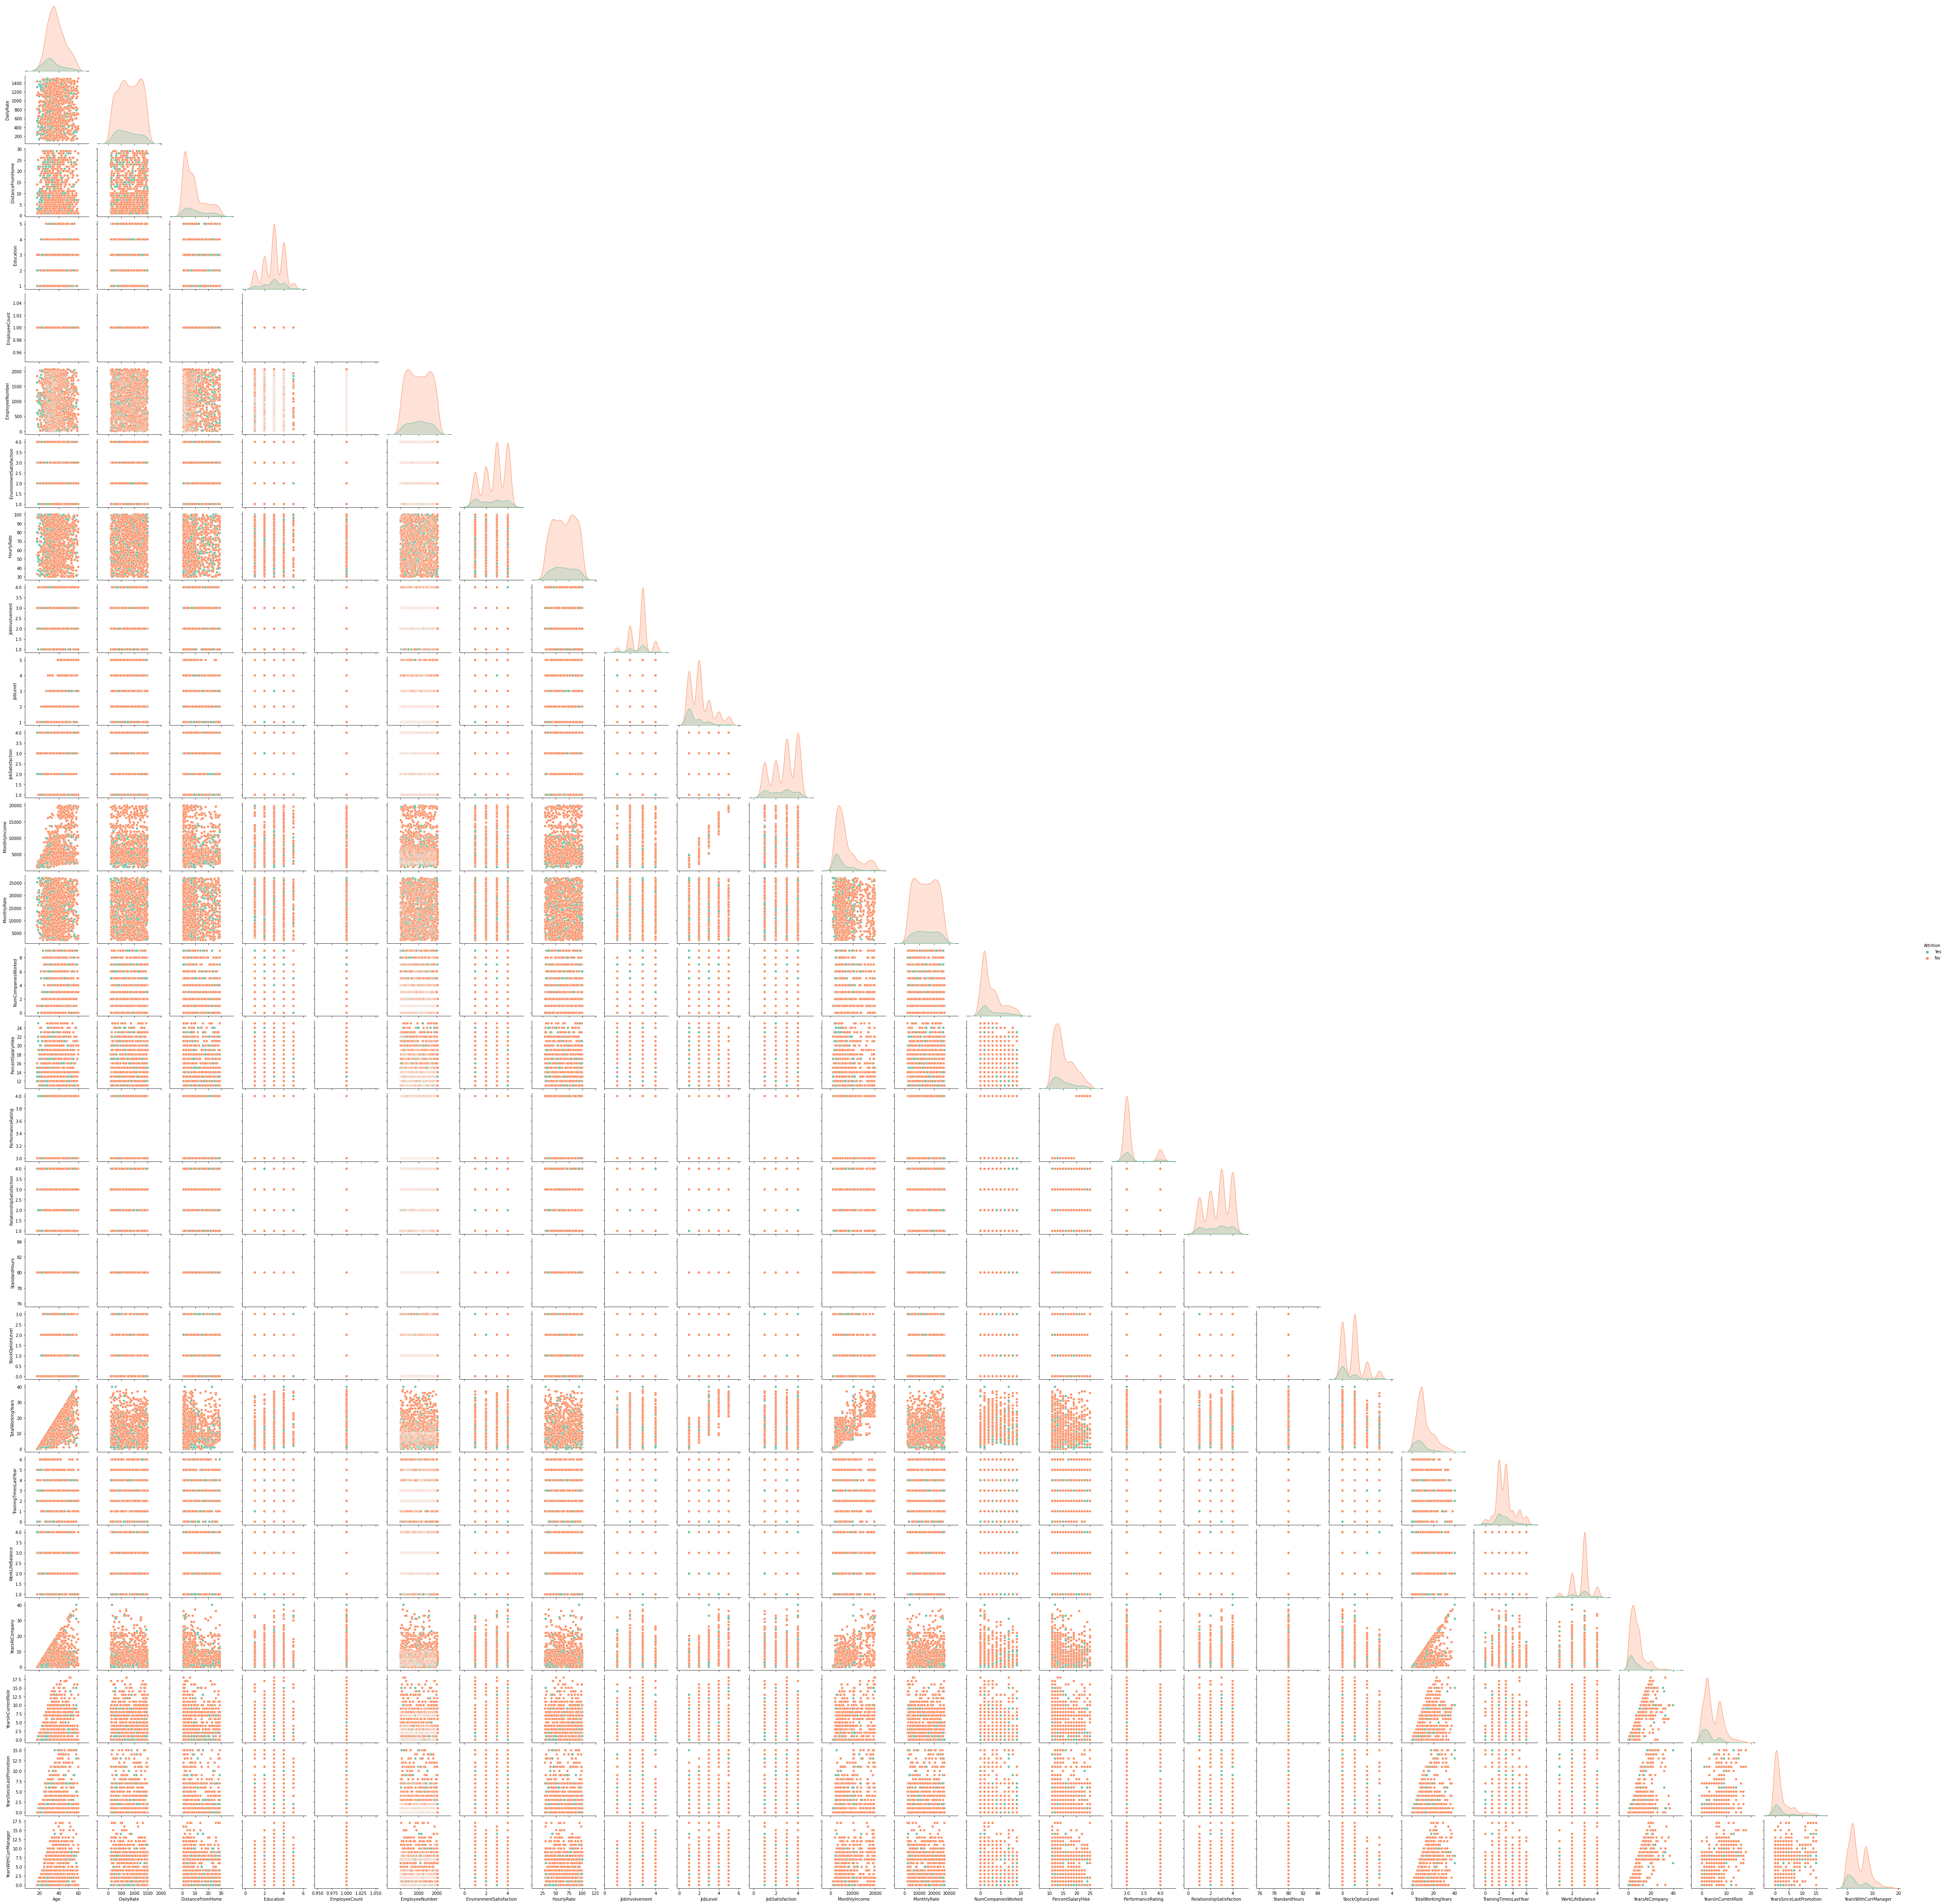

In [8]:
df.select_dtypes(exclude='object').join(df['Attrition'])
sns.pairplot(df.select_dtypes(exclude='object').join(df['Attrition']), hue = 'Attrition', palette = 'Set2', corner=True)

In [9]:
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [10]:
df.corr().style.background_gradient(cmap='coolwarm')

/usr/local/lib/python3.7/dist-packages/pandas/io/formats/style.py:2813: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(gmap) if vmin is None else vmin
/usr/local/lib/python3.7/dist-packages/pandas/io/formats/style.py:2814: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(gmap) if vmax is None else vmax


In [11]:
print(df['EmployeeCount'].value_counts())
print(df['StandardHours'].value_counts())


1    1470
Name: EmployeeCount, dtype: int64
80    1470
Name: StandardHours, dtype: int64


se decide hacer drop a la columna EmployeeCount y StandardHours ya que no aportan información

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-package

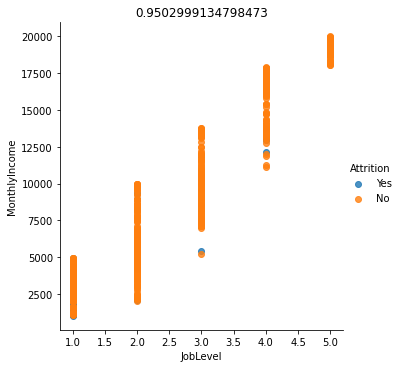

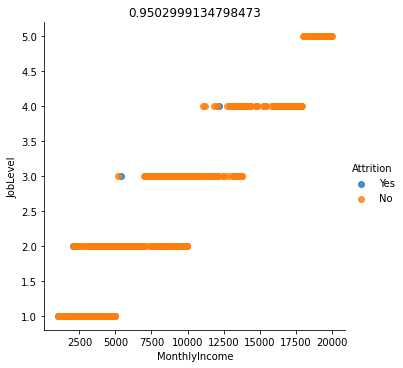

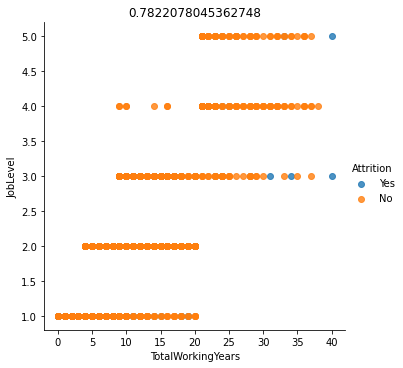

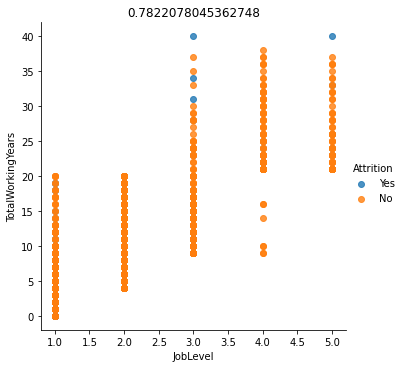

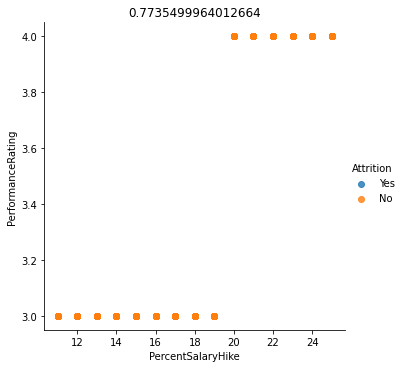

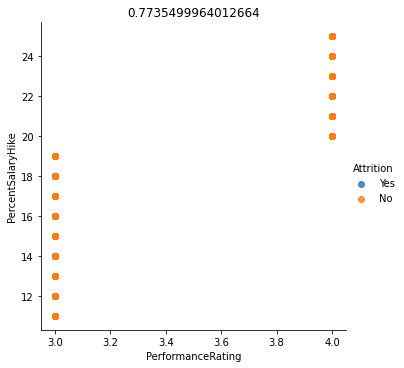

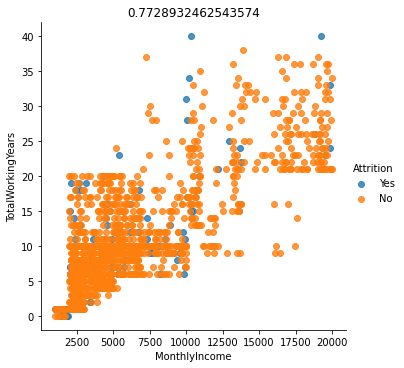

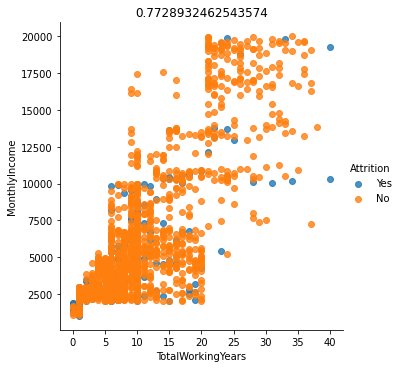

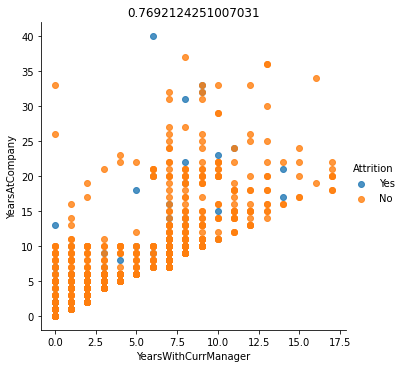

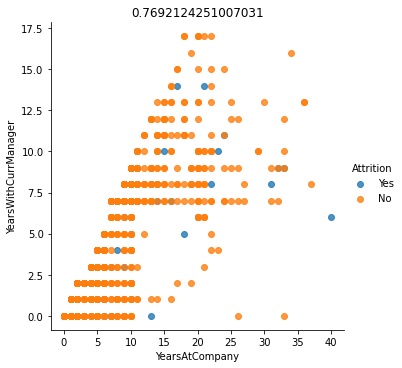

In [12]:
df_corr = df.corr().abs().unstack().reset_index()
top_corr = df_corr[df_corr[0]!=1].sort_values(by = 0,ascending=False).head(10)
# .sort_values(ascending=False)

for n in top_corr.index:

  sns.lmplot(df_corr.loc[n,'level_0'],  df_corr.loc[n,'level_1'], data=df, hue='Attrition', fit_reg=False)
  plt.title(df_corr.loc[n,0])

In [13]:
aux = df.pivot_table(index='BusinessTravel', columns= 'Attrition', aggfunc='count', margins=True)#.sort_values(by = 'All', ascending=False).drop('All', axis=1).drop('All').reset_index()
#aux.plot(x='Item_Type', kind = 'bar', stacked=True, ax = ax[0,0])
#ax[0,0].set_ylabel('Item_Outlet_Sales');
aux


Age             ... YearsWithCurrManager           
Attrition            No  Yes   All  ...                   No  Yes   All
BusinessTravel                      ...                                
Non-Travel          138   12   150  ...                  138   12   150
Travel_Frequently   208   69   277  ...                  208   69   277
Travel_Rarely       887  156  1043  ...                  887  156  1043
All                1233  237  1470  ...                 1233  237  1470

[4 rows x 99 columns]

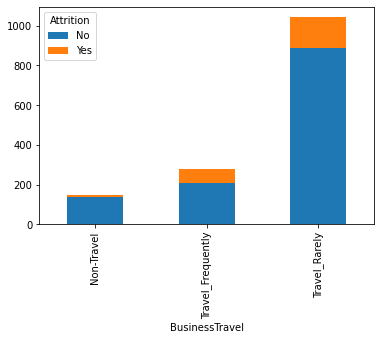

In [14]:
df[['BusinessTravel','Attrition']].value_counts().unstack().plot(kind='bar',stacked='true')

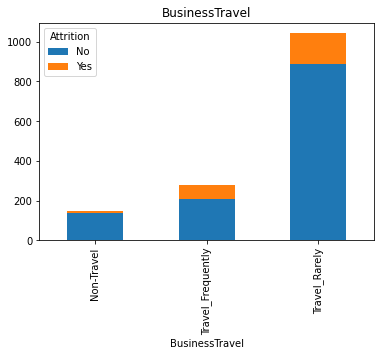

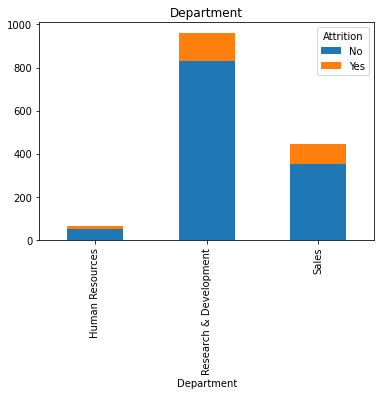

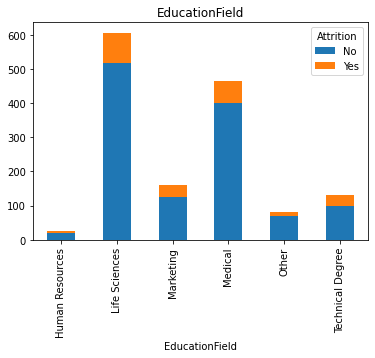

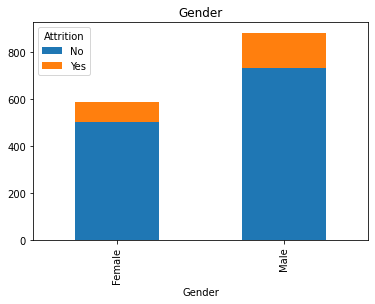

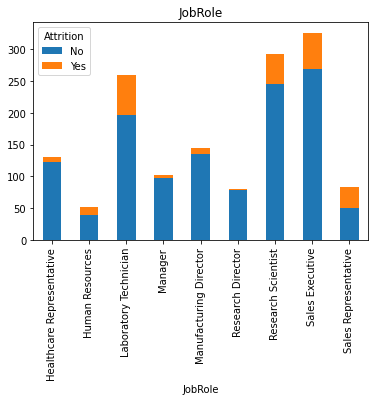

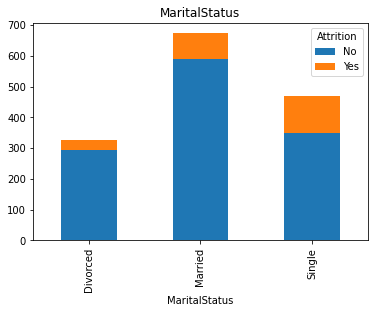

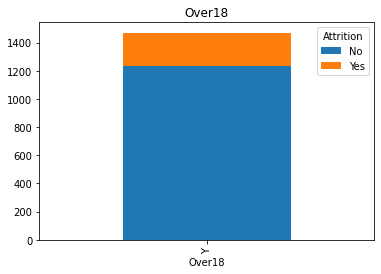

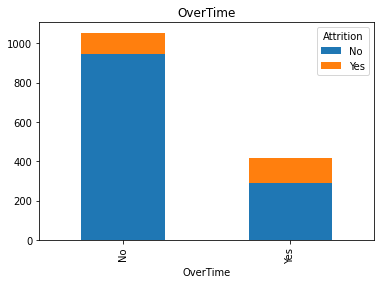

In [15]:
for n in df.drop(columns='Attrition').select_dtypes(include='object'):
  df[[n,'Attrition']].value_counts().unstack().plot(kind='bar',stacked='true')
  plt.title(n)
  plt.xticks(rotation=90)

Como resumen podemos concluir lo siguiente:
- Como el propósito de es entrenar un algoritmo de machine, se opta por hacer drop a las siguientes columnas que no aportan información: Over18, EmployeeCount y StandardHours 
- Se nota el sesgo en varias columnas: OverTime, BusinessTravel, Department
- Se decide utilizar Attrition como la variable target para los algoritmos ML, esto quita que tambien se hará un análisis no supervisado para detecar patrones de esta misma variable con otras

In [16]:
df.drop(columns=['Over18','EmployeeCount','StandardHours'], inplace = True)

In [17]:
df.select_dtypes(include='object')

Attrition     BusinessTravel  ... MaritalStatus OverTime
0          Yes      Travel_Rarely  ...        Single      Yes
1           No  Travel_Frequently  ...       Married       No
2          Yes      Travel_Rarely  ...        Single      Yes
3           No  Travel_Frequently  ...       Married      Yes
4           No      Travel_Rarely  ...       Married       No
...        ...                ...  ...           ...      ...
1465        No  Travel_Frequently  ...       Married       No
1466        No      Travel_Rarely  ...       Married       No
1467        No      Travel_Rarely  ...       Married      Yes
1468        No  Travel_Frequently  ...       Married       No
1469        No      Travel_Rarely  ...       Married       No

[1470 rows x 8 columns]

In [18]:
df_disagregated = df.copy()

In [19]:
df.select_dtypes(include='object').columns

Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'OverTime'],
      dtype='object')

In [20]:
columns_resp = df.select_dtypes(include='object').columns
ohe = OneHotEncoder(sparse=False)

for col in columns_resp:
  print(col)
  print('pass')
  result = ohe.fit_transform(df_disagregated[col].values.reshape(-1,1))
  print(ohe.categories_)
  df_disagregated.reset_index(drop=True, inplace = True)
  df_disagregated = df_disagregated.merge(pd.DataFrame(result, columns=ohe.categories_[0]) , left_index=True, right_index=True)
  df_disagregated.drop(col, axis=1, inplace = True)

Attrition
pass
[array(['No', 'Yes'], dtype=object)]
BusinessTravel
pass
[array(['Non-Travel', 'Travel_Frequently', 'Travel_Rarely'], dtype=object)]
Department
pass
[array(['Human Resources', 'Research & Development', 'Sales'], dtype=object)]
EducationField
pass
[array(['Human Resources', 'Life Sciences', 'Marketing', 'Medical',
       'Other', 'Technical Degree'], dtype=object)]
Gender
pass
[array(['Female', 'Male'], dtype=object)]
JobRole
pass
[array(['Healthcare Representative', 'Human Resources',
       'Laboratory Technician', 'Manager', 'Manufacturing Director',
       'Research Director', 'Research Scientist', 'Sales Executive',
       'Sales Representative'], dtype=object)]
MaritalStatus
pass
[array(['Divorced', 'Married', 'Single'], dtype=object)]
OverTime
pass
[array(['No', 'Yes'], dtype=object)]


In [21]:
df_disagregated

Age  DailyRate  DistanceFromHome  Education  ...  Married  Single  No_y  Yes_y
0      41       1102                 1          2  ...      0.0     1.0   0.0    1.0
1      49        279                 8          1  ...      1.0     0.0   1.0    0.0
2      37       1373                 2          2  ...      0.0     1.0   0.0    1.0
3      33       1392                 3          4  ...      1.0     0.0   0.0    1.0
4      27        591                 2          1  ...      1.0     0.0   1.0    0.0
...   ...        ...               ...        ...  ...      ...     ...   ...    ...
1465   36        884                23          2  ...      1.0     0.0   1.0    0.0
1466   39        613                 6          1  ...      1.0     0.0   1.0    0.0
1467   27        155                 4          3  ...      1.0     0.0   0.0    1.0
1468   49       1023                 2          3  ...      1.0     0.0   1.0    0.0
1469   34        628                 8          3  ...      1.0     0.0   1.0    0.0

[1470 rows x 54 columns]

In [22]:
df_disagregated.dtypes

Age                            int64
DailyRate                      int64
DistanceFromHome               int64
Education                      int64
EmployeeNumber                 int64
EnvironmentSatisfaction        int64
HourlyRate                     int64
JobInvolvement                 int64
JobLevel                       int64
JobSatisfaction                int64
MonthlyIncome                  int64
MonthlyRate                    int64
NumCompaniesWorked             int64
PercentSalaryHike              int64
PerformanceRating              int64
RelationshipSatisfaction       int64
StockOptionLevel               int64
TotalWorkingYears              int64
TrainingTimesLastYear          int64
WorkLifeBalance                int64
YearsAtCompany                 int64
YearsInCurrentRole             int64
YearsSinceLastPromotion        int64
YearsWithCurrManager           int64
No_x                         float64
Yes_x                        float64
Non-Travel                   float64
T

In [23]:
df

Age Attrition  ... YearsSinceLastPromotion  YearsWithCurrManager
0      41       Yes  ...                       0                     5
1      49        No  ...                       1                     7
2      37       Yes  ...                       0                     0
3      33        No  ...                       3                     0
4      27        No  ...                       2                     2
...   ...       ...  ...                     ...                   ...
1465   36        No  ...                       0                     3
1466   39        No  ...                       1                     7
1467   27        No  ...                       0                     3
1468   49        No  ...                       0                     8
1469   34        No  ...                       1                     2

[1470 rows x 32 columns]

In [24]:
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StockOptionLevel             int64
TotalWorkingYears            int64
TrainingTimesLastYear        int64
WorkLifeBalance              int64
YearsAtCompany      

In [25]:
df_disagregated.rename(columns={'No_x' : 'No_atrition',
                                'Yes_x' : 'Yes_atrition',
                                'No_y' : 'No_OverTime', 
                                'Yes_y' : 'Yes_OverTime',
                                'Human Resources_x' : 'Human Resources_Department',
                                'Human Resources_y' : 'Human Resources_JobRole'}, inplace = True)

In [26]:
df_disagregated.dtypes

Age                             int64
DailyRate                       int64
DistanceFromHome                int64
Education                       int64
EmployeeNumber                  int64
EnvironmentSatisfaction         int64
HourlyRate                      int64
JobInvolvement                  int64
JobLevel                        int64
JobSatisfaction                 int64
MonthlyIncome                   int64
MonthlyRate                     int64
NumCompaniesWorked              int64
PercentSalaryHike               int64
PerformanceRating               int64
RelationshipSatisfaction        int64
StockOptionLevel                int64
TotalWorkingYears               int64
TrainingTimesLastYear           int64
WorkLifeBalance                 int64
YearsAtCompany                  int64
YearsInCurrentRole              int64
YearsSinceLastPromotion         int64
YearsWithCurrManager            int64
No_atrition                   float64
Yes_atrition                  float64
Non-Travel  

In [27]:
X_agregated  = df.drop(columns='Attrition')
X_disagregated = df_disagregated.drop(columns=['Yes_atrition','No_atrition'])
y = df['Attrition']


In [28]:
X_agregated

Age     BusinessTravel  ...  YearsSinceLastPromotion YearsWithCurrManager
0      41      Travel_Rarely  ...                        0                    5
1      49  Travel_Frequently  ...                        1                    7
2      37      Travel_Rarely  ...                        0                    0
3      33  Travel_Frequently  ...                        3                    0
4      27      Travel_Rarely  ...                        2                    2
...   ...                ...  ...                      ...                  ...
1465   36  Travel_Frequently  ...                        0                    3
1466   39      Travel_Rarely  ...                        1                    7
1467   27      Travel_Rarely  ...                        0                    3
1468   49  Travel_Frequently  ...                        0                    8
1469   34      Travel_Rarely  ...                        1                    2

[1470 rows x 31 columns]

In [29]:
X_disagregated

Age  DailyRate  DistanceFromHome  ...  Single  No_OverTime  Yes_OverTime
0      41       1102                 1  ...     1.0          0.0           1.0
1      49        279                 8  ...     0.0          1.0           0.0
2      37       1373                 2  ...     1.0          0.0           1.0
3      33       1392                 3  ...     0.0          0.0           1.0
4      27        591                 2  ...     0.0          1.0           0.0
...   ...        ...               ...  ...     ...          ...           ...
1465   36        884                23  ...     0.0          1.0           0.0
1466   39        613                 6  ...     0.0          1.0           0.0
1467   27        155                 4  ...     0.0          0.0           1.0
1468   49       1023                 2  ...     0.0          1.0           0.0
1469   34        628                 8  ...     0.0          1.0           0.0

[1470 rows x 52 columns]

In [30]:

columns_objects = X_agregated.select_dtypes(include='object')
labelencoder = LabelEncoder()

for col in columns_objects:
  print(col)
  X_agregated[col] = labelencoder.fit_transform(X_agregated[col])
  print('pass')

X_agregated.head()

BusinessTravel
pass
Department
pass
EducationField
pass
Gender
pass
JobRole
pass
MaritalStatus
pass
OverTime
pass


Age  BusinessTravel  ...  YearsSinceLastPromotion  YearsWithCurrManager
0   41               2  ...                        0                     5
1   49               1  ...                        1                     7
2   37               2  ...                        0                     0
3   33               1  ...                        3                     0
4   27               2  ...                        2                     2

[5 rows x 31 columns]

In [31]:
X_agregated_train, X_agregated_test, y_train, y_test = train_test_split(X_agregated, y, test_size=0.30, random_state=42, stratify=y)

In [32]:
scaler = StandardScaler()
X_agregated_train = scaler.fit_transform(X_agregated_train)
X_agregated_test = scaler.transform(X_agregated_test)

In [33]:
rfc = RandomForestClassifier(bootstrap= True,
                             max_depth= 10,
                             max_features= 'sqrt',
                             min_samples_leaf= 4,
                             min_samples_split= 10,
                             n_estimators= 1000)
rfc.fit(X_agregated_train, y_train)
print(rfc.score(X_agregated_train, y_train))
print(rfc.score(X_agregated_test, y_test))

0.902818270165209
0.8276643990929705


<BarContainer object of 31 artists>

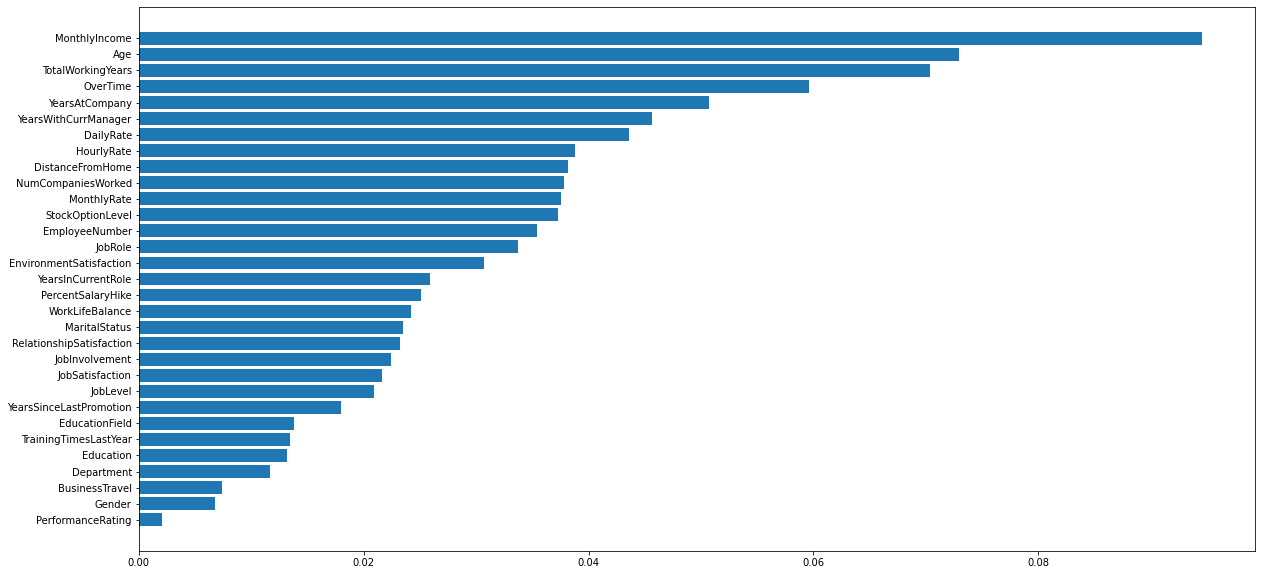

In [34]:
rfc.feature_importances_
agregated_features = pd.DataFrame({'Features':X_agregated.columns , 'Values':rfc.feature_importances_ })
agregated_features.sort_values(by='Values', inplace = True)
plt.figure(figsize=(20,10))
plt.barh(agregated_features['Features'],agregated_features['Values'])

In [35]:
X_disagregated_train, X_disagregated_test, y_train, y_test = train_test_split(X_disagregated, y, test_size=0.30, random_state=42, stratify=y)

In [36]:
scaler = StandardScaler()
X_disagregated_train = scaler.fit_transform(X_disagregated_train)
X_disagregated_test = scaler.transform(X_disagregated_test)

In [37]:
rfc = RandomForestClassifier(bootstrap= True,
                             max_depth= 10,
                             max_features= 'sqrt',
                             min_samples_leaf= 4,
                             min_samples_split= 10,
                             n_estimators= 1000)
rfc.fit(X_disagregated_train, y_train)
print(rfc.score(X_disagregated_train, y_train))
print(rfc.score(X_disagregated_test, y_test))

0.9047619047619048
0.8390022675736961


<BarContainer object of 52 artists>

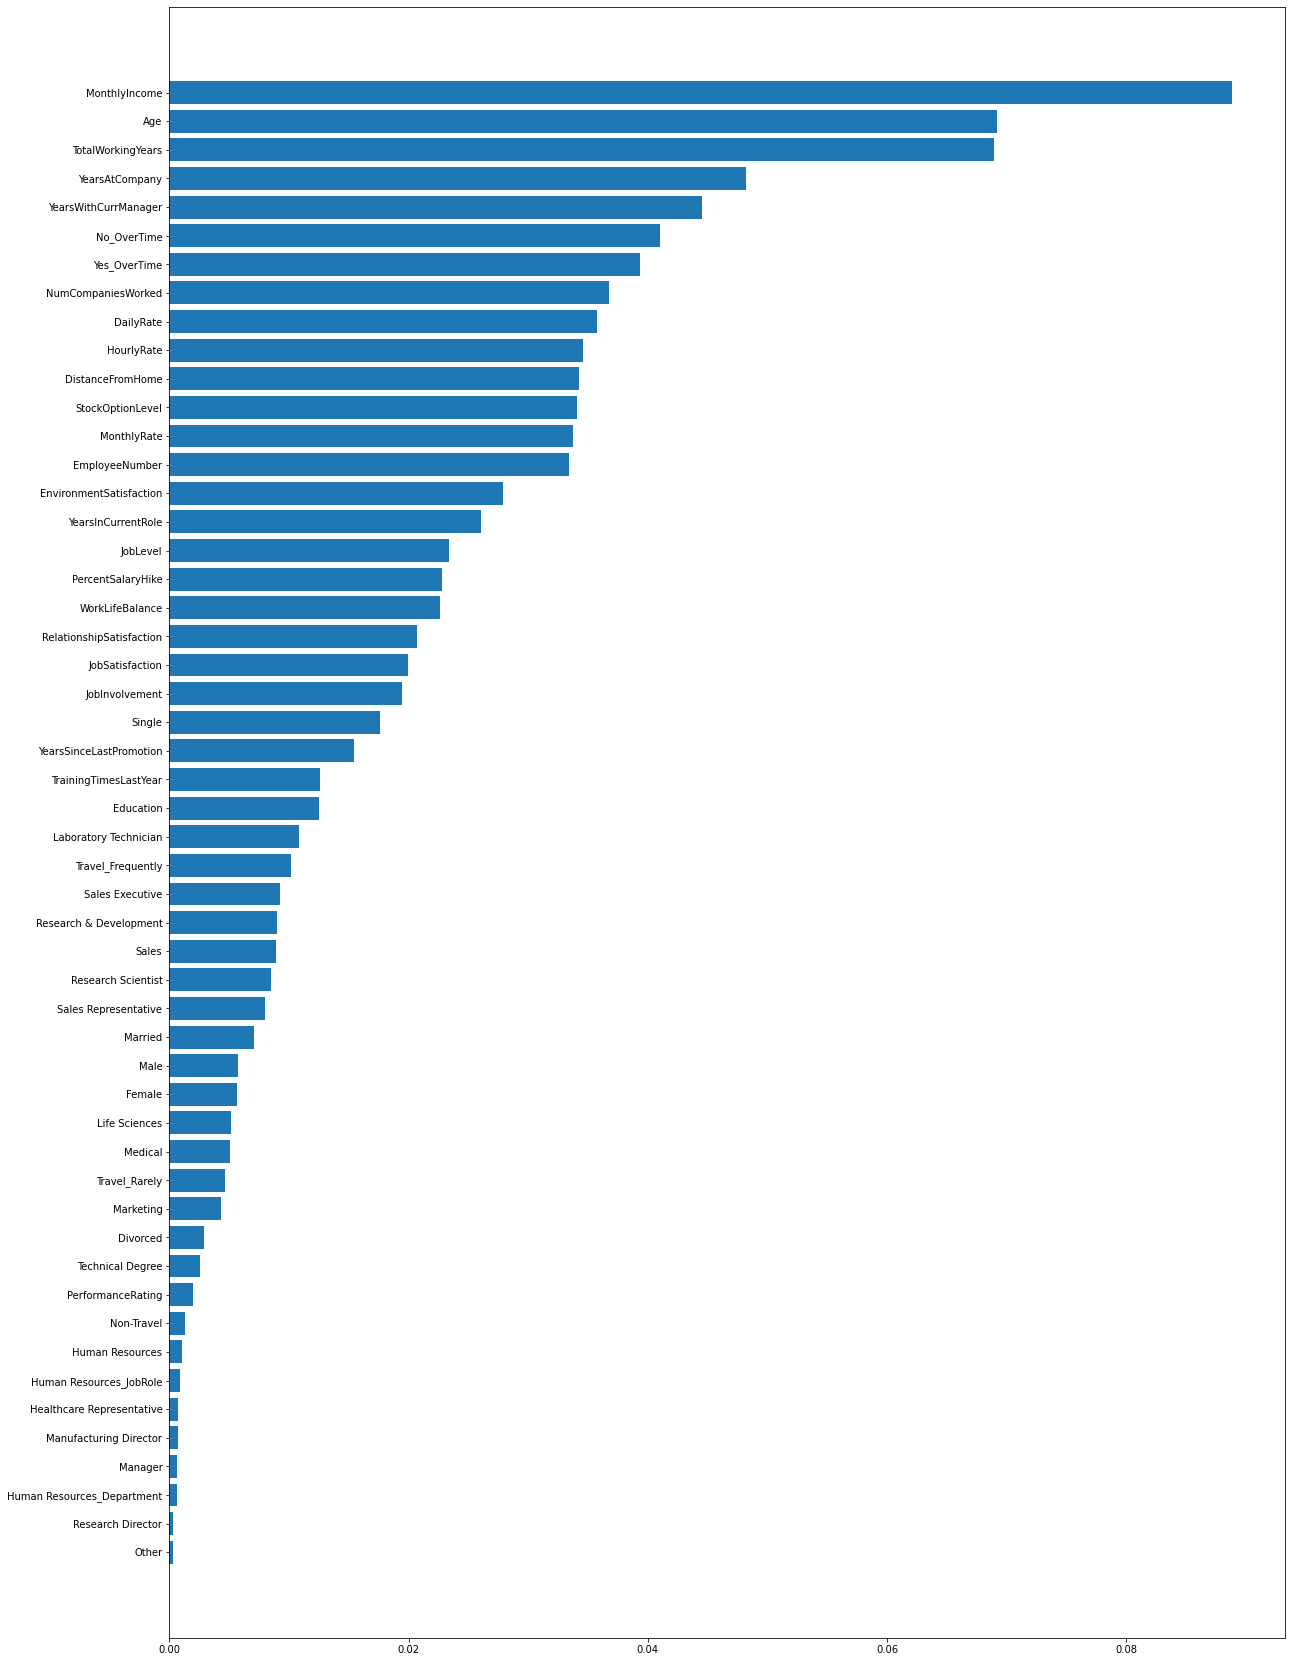

In [38]:
rfc.feature_importances_
disagregated_features = pd.DataFrame({'Features':X_disagregated.columns , 'Values':rfc.feature_importances_ })
disagregated_features.sort_values(by='Values', inplace = True)
plt.figure(figsize=(20,30))
plt.barh(disagregated_features['Features'],disagregated_features['Values'])